# PoS-Taging with Hiden Markov Model (HMM) and Viterb algorithm

## Init

In [1]:
## Imports
import pandas as pd
import numpy as np
import os

In [2]:
corpora_path = os.path.realpath('es-corpora/train/')

## Spanish Corpus
* Corpus del Español Actual: http://spanishfn.org/tools/cea/spanish
* Wikicorpus v1.0: https://www.cs.upc.edu/~nlp/wikicorpus/
* Universal POS: https://universaldependencies.org/u/pos/index.html

### Corpus Structure

* Spanish FreeLing part-of-speech tagset overview

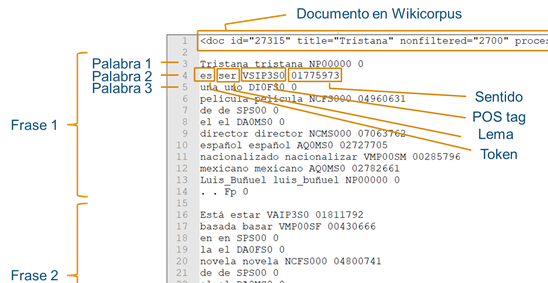

In [3]:
#Function to create the tagset overview / corpus structure
def tagset_overview():
    '''This function creates a tagset overview based in FreeLing pos-tagset'''
    
    targetset = list()
    adjetive = [{"position":"0","atribute":"category","values":"A:adjective"},{"position":"1","atribute":"type","values":"O:ordinal; Q:qualificative; P:possessive"},{"position":"2","atribute":"degree","values":"S:superlative; V:evaluative"},{"position":"3","atribute":"gen","values":"F:feminine; M:masculine; C:common"},{"position":"4","atribute":"num","values":"S:singular; P:plural; N:invariable"},{"position":"5","atribute":"possessorpers","values":"1:1; 2:2; 3:3"},{"position":"6","atribute":"possessornum","values":"S:singular; P:plural; N:invariable"}]
    conjuntion=[{"position":"0","atribute":"category","values":"C:conjunction"},{"position":"1","atribute":"type","values":"C:coordinating; S:subordinating"}]
    determiner=[{"position":"0","atribute":"category","values":"D:determiner"},{"position":"1","atribute":"type","values":"A:article; D:demonstrative; I:indefinite; P:possessive; T:interrogative; E:exclamative"},{"position":"2","atribute":"person","values":"1:1; 2:2; 3:3"},{"position":"3","atribute":"gen","values":"F:feminine; M:masculine; C:common"},{"position":"4","atribute":"num","values":"S:singular; P:plural; N:invariable"},{"position":"5","atribute":"possessornum","values":"S:singular; P:plural; N:invariable"}]
    noun=[{"position":"0","atribute":"category","values":"N:noun"},{"position":"1","atribute":"type","values":"C:common; P:proper"},{"position":"2","atribute":"gen","values":"F:feminine; M:masculine; C:common"},{"position":"3","atribute":"num","values":"S:singular; P:plural; N:invariable"},{"position":"4","atribute":"neclass","values":"S:person; G:location; O:organization; V:other"},{"position":"5","atribute":"nesubclass","values":"Not used"},{"position":"6","atribute":"degree","values":"V:evaluative"}]
    pronoun=[{"position":"0","atribute":"category","values":"P:pronoun"},{"position":"1","atribute":"type","values":"D:demonstrative;   E:exclamative;   I:indefinite;   P:personal;   R:relative;   T:interrogative"},{"position":"2","atribute":"person","values":"1:1;   2:2;   3:3"},{"position":"3","atribute":"gen","values":"F:feminine;   M:masculine;   C:common"},{"position":"4","atribute":"num","values":"S:singular;   P:plural;   N:invariable"},{"position":"5","atribute":"case","values":"N:nominative;   A:accusative;   D:dative;   O:oblique"},{"position":"6","atribute":"polite","values":"P:yes"}]
    adverb=[{"position":"0","atribute":"category","values":"R:adverb"},{"position":"1","atribute":"type","values":"N:negative;   G:general"}]
    adposition=[{"position":"0","atribute":"category","values":"S:adposition"},{"position":"1","atribute":"type","values":"P:preposition"}]
    verb=[{"position":"0","atribute":"category","values":"V:verb"},{"position":"1","atribute":"type","values":"M:main;   A:auxiliary;   S:semiauxiliary"},{"position":"2","atribute":"mood","values":"I:indicative;   S:subjunctive;   M:imperative;   P:participle;   G:gerund;   N:infinitive"},{"position":"3","atribute":"tense","values":"P:present;   I:imperfect;   F:future;   S:past;   C:conditional"},{"position":"4","atribute":"person","values":"1:1;   2:2;   3:3"},{"position":"5","atribute":"num","values":"S:singular;   P:plural"},{"position":"6","atribute":"gen","values":"F:feminine;   M:masculine;   C:common"}]
    number=[{"position":"0","atribute":"category","values":"Z:number"},{"position":"1","atribute":"type","values":"d:partitive;   m:currency;   p:percentage;   u:unit"}]
    date=[{"position":"0","atribute":"category","values":"W:date"}]
    interjection=[{"position":"0","atribute":"category","values":"I:interjection"}]
    punctuation=[{"tag":"Fd","attributes":"pos:punctuation;   type:colon"},{"tag":"Fc","attributes":"pos:punctuation;   type:comma"},{"tag":"Flt","attributes":"pos:punctuation;  type:curlybracket;   punctenclose:close"},{"tag":"Fla","attributes":"pos:punctuation;  type:curlybracket;   punctenclose:open"},{"tag":"Fs","attributes":"pos:punctuation;   type:etc"},{"tag":"Fat","attributes":"pos:punctuation;  type:exclamationmark;   punctenclose:close"},{"tag":"Faa","attributes":"pos:punctuation;  type:exclamationmark;   punctenclose:open"},{"tag":"Fg","attributes":"pos:punctuation;   type:hyphen"},{"tag":"Fz","attributes":"pos:punctuation;   type:other"},{"tag":"Fpt","attributes":"pos:punctuation;  type:parenthesis;   punctenclose:close"},{"tag":"Fpa","attributes":"pos:punctuation;  type:parenthesis;   punctenclose:open"},{"tag":"Ft","attributes":"pos:punctuation;   type:percentage"},{"tag":"Fp","attributes":"pos:punctuation;   type:period"},{"tag":"Fit","attributes":"pos:punctuation;  type:questionmark;   punctenclose:close"},{"tag":"Fia","attributes":"pos:punctuation;  type:questionmark;   punctenclose:open"},{"tag":"Fe","attributes":"pos:punctuation;   type:quotation"},{"tag":"Frc","attributes":"pos:punctuation;  type:quotation;   punctenclose:close"},{"tag":"Fra","attributes":"pos:punctuation;  type:quotation;   punctenclose:open"},{"tag":"Fx","attributes":"pos:punctuation;   type:semicolon"},{"tag":"Fh","attributes":"pos:punctuation;   type:slash"},{"tag":"Fct","attributes":"pos:punctuation;  type:squarebracket;   punctenclose:close"},{"tag":"Fca","attributes":"pos:punctuation;  type:squarebracket;   punctenclose:open"}]

    targetset.append(adjetive)
    targetset.append(conjuntion)
    targetset.append(determiner)
    targetset.append(noun)
    targetset.append(pronoun)
    targetset.append(adverb)
    targetset.append(adposition)
    targetset.append(verb)
    targetset.append(number)
    targetset.append(date)
    targetset.append(interjection)
    targetset.append(punctuation)

    # Add group and category columns
    for lista in targetset:
        categoria_dict=lista[0]
        grupo=""
        categoria=""

        if("values" in categoria_dict):
            grupo = categoria_dict["values"]
            categoria = grupo.split(":")[0]
        else:
            grupo = "F:punctuation"
            categoria = "F"

        for dictionario in lista:
            dictionario["group"] = grupo
            dictionario["category"] = categoria
            
    # Create the dataframe
    df = pd.DataFrame()

    # Add the list of tagsets in dataframe
    for lista in targetset:
        df = df.append(pd.DataFrame(lista))

    # df = df.reset_index()
    
    return df

In [4]:
#Create the tagset overview
postag_df = tagset_overview()

postag_df.head(10)

,position,atribute,values,group,category,tag,attributes
0,0,category,A:adjective,A:adjective,A,NaN,NaN
1,1,type,O:ordinal; Q:qualificative; P:possessive,A:adjective,A,NaN,NaN
2,2,degree,S:superlative; V:evaluative,A:adjective,A,NaN,NaN
3,3,gen,F:feminine; M:masculine; C:common,A:adjective,A,NaN,NaN
4,4,num,S:singular; P:plural; N:invariable,A:adjective,A,NaN,NaN
5,5,possessorpers,1:1; 2:2; 3:3,A:adjective,A,NaN,NaN
6,6,possessornum,S:singular; P:plural; N:invariable,A:adjective,A,NaN,NaN
0,0,category,C:conjunction,C:conjunction,C,NaN,NaN
1,1,type,C:coordinating; S:subordinating,C:conjunction,C,NaN,NaN
0,0,category,D:determiner,D:determiner,D,NaN,NaN


### Manipulating and parsing the corpus

In [5]:
# Create dataframe function
def create_df(filename: str, encoding='ISO-8859-1') -> pd.DataFrame:
    '''This function creates a pandas dataframe based in wikicorpus'''
    
    # Load txt file with numpy
    # The enconding depends on the file/dataset
    Data = np.genfromtxt(corpora_path +  f"/{filename}.txt", dtype=str, invalid_raise=False,
                     encoding=encoding, comments='<doc')
    
    # Create dataframe with numpy array
    columns = ['token', 'lemma', 'pos_tag',	'sense']
    df = pd.DataFrame(Data, columns=columns)
    
    return df

In [6]:
def add_features(df: pd.DataFrame) -> pd.DataFrame:
    ''' '''
    df['token'] = df['token'].apply(lambda token: ' '.join(token.split('_')))
    df['lemma'] = df['lemma'].apply(lambda lemma: ' '.join(lemma.split('_')))
    df['tag'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[:2])
    df['emission'] = df[['token', 'pos_tag']].apply(lambda token_tag: token_tag.values[0] + '|' + token_tag.values[1][:2], axis=1)
    df['transition'] = df.tag + '|' + df.tag.shift(1)
    df.loc[0, 'transition'] = df.loc[0, 'tag'] + '|'
    df['category'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[:1])
    df['type'] = df['pos_tag'].apply(lambda pos_tag: np.nan if pos_tag.capitalize().startswith(('W', 'I', 'F')) else pos_tag[1:2])

    df['person'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[2:3] if pos_tag.capitalize().startswith(('D', 'P')) 
                                    else ( pos_tag[4:5] if pos_tag.capitalize().startswith('V') else  np.nan))

    df['degree'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[2:3] if pos_tag.capitalize().startswith('A') 
                                    else ( pos_tag[6:7] if pos_tag.capitalize().startswith('N') else  np.nan))

    df['mood'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[2:3] if pos_tag.capitalize().startswith('V') else np.nan)
    df['tense'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[3:4] if pos_tag.capitalize().startswith('V') else np.nan)

    df['gen'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[3:4] if pos_tag.capitalize().startswith(('A', 'D', 'P')) 
                                    else ( pos_tag[2:3] if pos_tag.capitalize().startswith('N')
                                            else (pos_tag[6:7] if pos_tag.capitalize().startswith('V') else  np.nan)))

    df['num'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[4:5] if pos_tag.capitalize().startswith(('A', 'D', 'P')) 
                                    else ( pos_tag[3:4] if pos_tag.capitalize().startswith('N')
                                            else (pos_tag[5:6] if pos_tag.capitalize().startswith('V') else  np.nan)))

    df['class'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[4:5] if pos_tag.capitalize().startswith('N') 
                                    else ( pos_tag[2:3] if pos_tag.capitalize().startswith('S') else  np.nan))

    df['subclass'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[5:6] if pos_tag.capitalize().startswith('N') 
                                    else ( pos_tag[3:4] if pos_tag.capitalize().startswith('S') else  np.nan))

    df['case'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[5:6] if pos_tag.capitalize().startswith('P') else  np.nan)
    df['polite'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[6:7] if pos_tag.capitalize().startswith('P') else  np.nan)
    df['possessorpers'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[5:6] if pos_tag.capitalize().startswith(('A', 'D')) else  np.nan)
    df['possessornum'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[6:7] if pos_tag.capitalize().startswith('A') else  np.nan)
    
    
    
    return df

In [7]:
# Unzip the file
import zipfile
with zipfile.ZipFile(corpora_path + '/spanish_tagged_57.zip') as zip_file:
    zip_file.extractall(corpora_path)

In [8]:
filename = 'spanish_tagged_57'
df = create_df(filename)

<ipython-input-5-9a3d4ba8d93a>:7: ConversionWarning: Some errors were detected !
    Line #361 (got 1 columns instead of 4)
    Line #542 (got 1 columns instead of 4)
    Line #616 (got 1 columns instead of 4)
    Line #651 (got 1 columns instead of 4)
    Line #1044 (got 1 columns instead of 4)
    Line #1736 (got 1 columns instead of 4)
    Line #2093 (got 1 columns instead of 4)
    Line #2262 (got 1 columns instead of 4)
    Line #2364 (got 1 columns instead of 4)
    Line #2523 (got 1 columns instead of 4)
    Line #2613 (got 1 columns instead of 4)
    Line #2690 (got 1 columns instead of 4)
    Line #2883 (got 1 columns instead of 4)
    Line #3149 (got 1 columns instead of 4)
    Line #3229 (got 1 columns instead of 4)
    Line #6344 (got 1 columns instead of 4)
    Line #6478 (got 1 columns instead of 4)
    Line #6530 (got 1 columns instead of 4)
    Line #7636 (got 1 columns instead of 4)
    Line #7867 (got 1 columns instead of 4)
    Line #8068 (got 1 columns instead of 4)

In [9]:
df.head()

,token,lemma,pos_tag,sense
0,Vedad,vedar,VMM02P0,0
1,Ibi¨evi,ibi¨evi,NP00000,0
2,",",",",Fc,0
3,nacido,nacer,VMP00SM,00249716
4,el,el,DA0MS0,0


In [10]:
add_features(df)

,token,lemma,pos_tag,sense,tag,emission,transition,category,type,person,...,mood,tense,gen,num,class,subclass,case,polite,possessorpers,possessornum
0,Vedad,vedar,VMM02P0,0,VM,Vedad|VM,VM|,V,M,2,...,M,0,0,P,NaN,NaN,NaN,NaN,NaN,NaN
1,Ibi¨evi,ibi¨evi,NP00000,0,NP,Ibi¨evi|NP,NP|VM,N,P,NaN,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
2,",",",",Fc,0,Fc,",|Fc",Fc|NP,F,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nacido,nacer,VMP00SM,00249716,VM,nacido|VM,VM|Fc,V,M,0,...,P,0,M,S,NaN,NaN,NaN,NaN,NaN,NaN
4,el,el,DA0MS0,0,DA,el|DA,DA|VM,D,A,0,...,NaN,NaN,M,S,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138245,-,-,Fg,0,Fg,-|Fg,Fg|NP,F,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1138246,Enciclopedia Auñamendi,enciclopedia auñamendi,NP00000,0,NP,Enciclopedia Auñamendi|NP,NP|Fg,N,P,NaN,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
1138247,;,;,Fx,0,Fx,;|Fx,Fx|NP,F,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1138248,ENDOFARTICLE,endofarticle,NP00000,0,NP,ENDOFARTICLE|NP,NP|Fx,N,P,NaN,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN


In [11]:
df.head()

,token,lemma,pos_tag,sense,tag,emission,transition,category,type,person,...,mood,tense,gen,num,class,subclass,case,polite,possessorpers,possessornum
0,Vedad,vedar,VMM02P0,0,VM,Vedad|VM,VM|,V,M,2,...,M,0,0,P,NaN,NaN,NaN,NaN,NaN,NaN
1,Ibi¨evi,ibi¨evi,NP00000,0,NP,Ibi¨evi|NP,NP|VM,N,P,NaN,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
2,",",",",Fc,0,Fc,",|Fc",Fc|NP,F,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nacido,nacer,VMP00SM,00249716,VM,nacido|VM,VM|Fc,V,M,0,...,P,0,M,S,NaN,NaN,NaN,NaN,NaN,NaN
4,el,el,DA0MS0,0,DA,el|DA,DA|VM,D,A,0,...,NaN,NaN,M,S,NaN,NaN,NaN,NaN,0,NaN


In [12]:
# Save the dataframe as a csv file
# df.to_csv(corpora_path + '/spanish_tagged_57.csv')

## Hiden Markov Model (HMM) - Training the Model

### Counting Calculation

* tags (tags) `tagCountDict`: $C(tag)$
* emisiones (word|tag) `emissionProbDict`: $C(word|tag)$
* transiciones (tag|prevtag) `transitionDict`: $C(tag|prevtag)$

In [13]:
tagCountDict = dict(zip(df['tag'].value_counts().index, df['tag'].value_counts().values))
emissionDict = dict(zip(df['emission'].value_counts().index, df['emission'].value_counts().values))
transitionDict = dict(zip(df['transition'].value_counts().index, df['transition'].value_counts().values))

In [14]:
emissionDict

{'de|SP': 66434,
 ',|Fc': 61449,
 '.|Fp': 58294,
 'el|DA': 40600,
 'la|DA': 32071,
 'en|SP': 29624,
 'y|CC': 26362,
 ';|Fx': 20146,
 'a|SP': 18568,
 '(|Fp': 14483,
 ')|Fp': 14445,
 'los|DA': 10686,
 'que|PR': 9574,
 ':|Fd': 9311,
 'se|P0': 9125,
 '"|Fe': 9100,
 'un|DI': 8875,
 'por|SP': 8206,
 'con|SP': 8138,
 'una|DI': 7726,
 'las|DA': 7186,
 'su|DP': 6785,
 'es|VS': 6746,
 'como|CS': 4899,
 'para|SP': 4886,
 'que|CS': 4422,
 '-|Fg': 4340,
 'El|DA': 4179,
 'fue|VS': 3708,
 'ENDOFARTICLE|NP': 3613,
 'La|DA': 3329,
 'En|SP': 3074,
 'más|RG': 2621,
 'no|RN': 2503,
 'sus|DP': 2309,
 'o|CC': 2103,
 'se|PP': 2059,
 'externos|AQ': 1842,
 'también|RG': 1640,
 'entre|SP': 1613,
 'of|NC': 1567,
 'le|PP': 1499,
 'sobre|SP': 1411,
 'Enlaces|NC': 1409,
 'años|NC': 1364,
 'dos|Z': 1326,
 'son|VS': 1315,
 '||Fz': 1295,
 'lo|DA': 1241,
 'ha|VA': 1193,
 'pero|CC': 1178,
 'hasta|SP': 1168,
 'Referencias|NP': 1160,
 'desde|SP': 1143,
 'ciudad|NC': 1123,
 'Los|DA': 1093,
 'esta|DD': 1081,
 'lo|PP': 1076,

In [15]:
transitionDict

{'NC|DA': 66134,
 'SP|NC': 62664,
 'DA|SP': 61399,
 'Fp|NP': 37026,
 'SP|VM': 32359,
 'AQ|NC': 30338,
 'NC|SP': 27344,
 'Fc|NP': 25831,
 'NP|Fp': 24670,
 'NP|SP': 24188,
 'NC|DI': 17914,
 'Fp|NC': 17635,
 'NP|DA': 16263,
 'NP|Fx': 16087,
 'Fc|NC': 14511,
 'SP|AQ': 13966,
 'NP|Fc': 13875,
 'VM|NC': 11267,
 'NC|AQ': 11107,
 'NP|NC': 11081,
 'SP|NP': 10521,
 'DA|VM': 10169,
 'Fp|Z': 9508,
 'Z|SP': 9467,
 'Fp|AQ': 9361,
 'CC|NC': 9157,
 'Fx|NP': 9040,
 'VM|P0': 9027,
 'DA|Fp': 8996,
 'CC|NP': 8868,
 'SP|Fc': 8844,
 'SP|Fp': 8818,
 'NC|DP': 8731,
 'DI|SP': 8321,
 'NC|Z': 7912,
 'VM|NP': 7689,
 'NC|NP': 7215,
 'VM|SP': 6956,
 'VM|Fc': 6701,
 'Fc|AQ': 6691,
 'Z|Fp': 6625,
 'NC|VM': 6075,
 'VM|PR': 6032,
 'NC|Fc': 5787,
 'NC|CC': 5570,
 'NC|Fp': 5539,
 'DP|SP': 5412,
 'NP|CC': 5321,
 'VM|VM': 5198,
 'DI|VM': 5187,
 'AQ|DA': 4998,
 'VM|Fp': 4902,
 'Fx|Fp': 4871,
 'DA|Fc': 4852,
 'NC|NC': 4835,
 'VM|VS': 4799,
 'CC|Fc': 4376,
 'VM|RG': 4018,
 'CC|AQ': 3997,
 'DI|VS': 3964,
 'VM|CC': 3914,
 'CS|V

### Probalility Calculation

* probabilidades de transición:
$$P(tag|prevtag) = \frac{C(prevtag, tag)}{C(prevtag)}$$

* probabilidades de emisión:
 $$P(word|tag) = \frac{C(word|tag)}{C(tag)}$$

In [16]:
transitionProbDict = {} # matriz A
emissionProbDict = {} # matriz B

# transition Probabilities 
for key in transitionDict.keys():
  prevtag = key.split('|')[-1]
  # Coz the first element will not have a previous tag (prevtag) we need prevent a KeyError bug
  if prevtag != '': 
    transitionProbDict[key] = transitionDict[key]/(tagCountDict[prevtag])

# emission Probabilities 
for key in emissionDict.keys():
  tag = key.split('|')[-1]
  emissionProbDict[key] = emissionDict[key]/tagCountDict[tag]


In [17]:
transitionProbDict

{'NC|DA': 0.6534851089899409,
 'SP|NC': 0.33186986616954683,
 'DA|SP': 0.3914803810301075,
 'Fp|NP': 0.27539476522347095,
 'SP|VM': 0.36942449739134403,
 'AQ|NC': 0.16067068811202143,
 'NC|SP': 0.17434550300309873,
 'Fc|NP': 0.1921277529435391,
 'NP|Fp': 0.28284148494645844,
 'NP|SP': 0.15422282865121972,
 'NC|DI': 0.760162946618009,
 'Fp|NC': 0.09339533208700304,
 'NP|DA': 0.1606984051698583,
 'NP|Fx': 0.7985207981733347,
 'Fc|NC': 0.07685056217263969,
 'SP|AQ': 0.2389188264476948,
 'NP|Fc': 0.22539718639332013,
 'VM|NC': 0.05967026972635459,
 'NC|AQ': 0.1900094089470533,
 'NP|NC': 0.05868520980187585,
 'SP|NP': 0.07825388443029595,
 'DA|VM': 0.11609375178381834,
 'Fp|Z': 0.26678638570105784,
 'Z|SP': 0.06036164704982211,
 'Fp|AQ': 0.16014027884697632,
 'CC|NC': 0.04849566520673018,
 'Fx|NP': 0.06723839133636303,
 'VM|P0': 0.9017081210668265,
 'DA|Fp': 0.10313911627800326,
 'CC|NP': 0.06595907681093666,
 'SP|Fc': 0.14366938497027193,
 'SP|Fp': 0.10109834674738025,
 'NC|DP': 0.83879335

### Save the params

In [18]:
# Save the params
models_path = os.path.realpath('models')
os.mkdir(models_path)

np.save(models_path + '/transitionHMM.npy', transitionProbDict)
np.save(models_path + '/emissionHMM.npy', emissionProbDict)

## Viterbi - Decode

* Given a sentence Viterb Algorith find the best grammatical category for each word of sentence, calculating the best pathway in the Viterb Matrix using conditional probability. 

### Load the HMM Previously Trained

In [19]:
# Load the HMM Transition and Emission Probability
transitionProbdict = np.load(models_path + '/transitionHMM.npy', allow_pickle='TRUE').item()
emissionProbdict = np.load(models_path + '/emissionHMM.npy', allow_pickle='TRUE').item()

In [20]:
# Get the grammatical Categories present in corpus
state_set = set([e.split('|')[-1] for e in emissionProbDict.keys()]) 

In [21]:
# Indexing the state_set to identify it in the Viterbi Matrix
state_set_indexed = dict()
for i, pos in enumerate(state_set):
    state_set_indexed[pos] = i
state_set_indexed

{'Fe': 0,
 'RG': 1,
 'Fs': 2,
 'PD': 3,
 'PR': 4,
 'Fh': 5,
 'AQ': 6,
 'W': 7,
 'VS': 8,
 'CC': 9,
 'RN': 10,
 'DE': 11,
 'Fp': 12,
 'Fz': 13,
 'Zu': 14,
 'P0': 15,
 'Fd': 16,
 'Fi': 17,
 'VM': 18,
 'DI': 19,
 'Zp': 20,
 'Fl': 21,
 'AO': 22,
 'CS': 23,
 'I': 24,
 'PI': 25,
 'Fa': 26,
 'Fx': 27,
 'PX': 28,
 'Zd': 29,
 'DA': 30,
 'Fg': 31,
 'NP': 32,
 'VA': 33,
 'DT': 34,
 'PT': 35,
 'Ft': 36,
 'Zm': 37,
 'NC': 38,
 'Fc': 39,
 'DD': 40,
 'DP': 41,
 'SP': 42,
 'PP': 43,
 'Z': 44}

### Initial Distribution of Latent States

In [22]:
# Calculating the initial distribution of states

# Initial States are the first words in each sentence on corpus
# By the structure of corpus, the a paragraph init after a blank/empty line, so we need to process this

# Read the corpus again with pandas and do not skip the blank lines (skip_blank_lines=False)
Data = pd.read_csv(corpora_path +  "/spanish_tagged_57.txt", sep="\n", 
                      skip_blank_lines=False, dtype=str, encoding='ISO-8859-1', skiprows=1, names=['col'])

# Next put some structure in dataframe, separate the word and tag
Data['word'] = Data['col'].apply(lambda row: str(row).split(' ')[0] if row != np.nan else np.nan)
Data['tag'] = Data['col'].apply(lambda row: str(row).split(' ')[2][:2] if len(str(row).split(' ')) == 4 else np.nan)

In [23]:
Data.head()

,col,word,tag
0,Vedad vedar VMM02P0 0,Vedad,VM
1,Ibi¨evi ibi¨evi NP00000 0,Ibi¨evi,NP
2,", , Fc 0",",",Fc
3,nacido nacer VMP00SM 00249716,nacido,VM
4,el el DA0MS0 0,el,DA


In [24]:
# In this point we have NaN representing the blank/empty lines. Lets find out the indexes of those NaN lines and add 1
# In this way we'll have the indexes of the first words of all sentences on the corpus
indexes = list(Data.loc[pd.isna(Data['col']), :].index + 1 )

# Get the first/init words using the indexes of those words
initial_states = Data.loc[Data.index.intersection(indexes)]

In [25]:
# By the struture of the corpus in this point we have some NaN values in word and tag 
# given by lines that init with <doc and </doc
initial_states.loc[pd.isna(initial_states['tag'])]

,col,word,tag
360,</doc>,</doc>,NaN
541,</doc>,</doc>,NaN
615,</doc>,</doc>,NaN
650,</doc>,</doc>,NaN
1043,</doc>,</doc>,NaN
...,...,...,...
1199992,</doc>,</doc>,NaN
1200065,</doc>,</doc>,NaN
1200123,</doc>,</doc>,NaN
1200349,</doc>,</doc>,NaN


In [26]:
# Now we can drop all those rows with NaN values. 
# You can drop those lines before but using a query for col thats begin with <doc and </doc
initial_states.dropna(inplace=True)

initial_states.loc[pd.isna(initial_states['tag'])]

,col,word,tag


In [27]:
initial_states

,col,word,tag
31,Trayectoria trayectoria NP00000 06709272,Trayectoria,NP
34,Como como CS 0,Como,CS
68,Ibi¨evi ibi¨evi NP00000 0,Ibi¨evi,NP
95,Sin sin SPS00 0,Sin,SP
118,Allí allí RG 0,Allí,RG
...,...,...,...
1200505,Fiestas fiestas NP00000 0,Fiestas,NP
1200530,Referencias referencias NP00000 05019162,Referencias,NP
1200533,Vea ver VMM03S0 01456984,Vea,VM
1200538,Aranguren aranguren NP00000 0,Aranguren,NP


In [28]:
# Calculating the initial distribution of states
# Now lets calculate the Probability that a Tag appear in the beginning of a sentence

# initial_states['tag'].value_counts()
initial_states_tags_count = initial_states.pivot_table(columns=['tag'], aggfunc='size')

initial_states_tags_count

tag
AO       53
AQ      217
CC      419
CS      690
DA     7584
DD      877
DI      969
DP      967
Fa       14
Fc       16
Fd        4
Fe      259
Fg      266
Fi       34
Fp       85
Fs        4
Fx      236
Fz      161
I        11
NC     3079
NP    17230
P0      823
PD      210
PI      227
PP      277
PR        6
PT       10
PX        1
RG     2215
RN      151
SP     7116
VA      362
VM     3953
VS     1564
W        81
Z       877
Zd        3
Zm        1
Zp        7
Zu       15
dtype: int64

In [29]:
initial_states_tags_prob = {}
initial_states_tags_prob = dict(zip(initial_states_tags_count.keys(), initial_states_tags_count.values / initial_states.shape[0]))
initial_states_tags_prob

{'AO': 0.0010377099894271057,
 'AQ': 0.004248737126522301,
 'CC': 0.008203782746602968,
 'CS': 0.01350980929631515,
 'DA': 0.14849042565689,
 'DD': 0.017171163409954185,
 'DI': 0.018972471316129537,
 'DP': 0.018933312448603988,
 'Fa': 0.0002741120726788581,
 'Fc': 0.00031327094020440927,
 'Fd': 7.831773505110232e-05,
 'Fe': 0.005071073344558875,
 'Fg': 0.005208129380898305,
 'Fi': 0.0006657007479343697,
 'Fp': 0.0016642518698359243,
 'Fs': 7.831773505110232e-05,
 'Fx': 0.004620746368015037,
 'Fz': 0.0031522888358068686,
 'I': 0.00021537377139053138,
 'NC': 0.060285076555586015,
 'NP': 0.3373536437326233,
 'P0': 0.016113873986764303,
 'PD': 0.004111681090182872,
 'PI': 0.004444531464150057,
 'PP': 0.005423503152288836,
 'PR': 0.00011747660257665349,
 'PT': 0.0001957943376277558,
 'PX': 1.957943376277558e-05,
 'RG': 0.04336844578454791,
 'RN': 0.0029564944981791126,
 'SP': 0.13932725065591103,
 'VA': 0.00708775502212476,
 'VM': 0.07739750166425187,
 'VS': 0.03062223440498101,
 'W': 0.001

In [30]:
# The sum of all probability should be 1
print(sum(initial_states_tags_prob.values()))
print(np.array(list(initial_states_tags_prob.values())).sum())

0.9999999999999999
1.0


### Building the Viterbi algorithm

Given a sequence of words $\{w_1, w_2, \dots, w_n \}$, and a set of grammatical category (we use `FreeLing convection`, but the next matrix is represented with `UPoS convection` ), the Viterbi Matrix will be given by:

$$
\begin{array}{c c}
\begin{array}{c c c c}
\text{ADJ} \\
\text{ADV}\\
\text{PRON} \\
\vdots \\
{}
\end{array} 
&
\left[
\begin{array}{c c c c}
\nu_1(\text{ADJ}) & \nu_2(\text{ADJ}) & \dots  & \nu_n(\text{ADJ})\\
\nu_1(\text{ADV}) & \nu_2(\text{ADV}) & \dots  & \nu_n(\text{ADV})\\ 
\nu_1(\text{PRON}) & \nu_2(\text{PRON}) & \dots  & \nu_n(\text{PRON})\\
\vdots & \vdots & \dots & \vdots \\ \hdashline
w_1 & w_2 & \dots & w_n 
\end{array}
\right] 
\end{array}
$$

Where the probabilities of the first column (for one category $i$) are given by: 

$$
\nu_1(i) = \underbrace{\rho_i^{(0)}}_{\text{initial probability}} \times \underbrace{P(w_1 \vert i)}_{\text{emission}}
$$

then, for he second column (geven a category $j$) will be: 

$$
\nu_2(j) = \max_i \{ \nu_1(i) \times \underbrace{P(j \vert i)}_{\text{transition}} \times \underbrace{P(w_2 \vert j)}_{\text{emission}} \}
$$

so, in geneal, the probabilities for the column $t$ will be given by: 

$$
\nu_{t}(j) = \max_i \{ \overbrace{\nu_{t-1}(i)}^{\text{previous state}} \times \underbrace{P(j \vert i)}_{\text{transition}} \times \underbrace{P(w_t \vert j)}_{\text{emission}} \}
$$

In [31]:
from nltk import word_tokenize

In [32]:
def viterbi_matrix(token_sequence, transitionProbDict=transitionProbDict, emissionProbDict=emissionProbDict,
                   state_set_indexed=state_set_indexed, initial_states_tags_prob=initial_states_tags_prob):
    
    # Building the Viterbi Matrix
    viterbi_prob_matrix = np.zeros((len(state_set), len(token_sequence)))
    
    ## First Column initialization
    for tag in state_set_indexed.keys():
        tag_row = state_set_indexed[tag]
        word_tag = token_sequence[0].lower() + '|' + tag
        # We just consider the tags that are initial state
        if tag in initial_states_tags_prob.keys():
            if word_tag in emissionProbDict.keys():
                viterbi_prob_matrix[tag_row, 0] = initial_states_tags_prob[tag] * emissionProbDict[word_tag]
            
    ## Calculate the probabilities for the next columns
    for column in range(1, len(token_sequence)):
        for actual_tag in state_set_indexed.keys():
            actualtag_row = state_set_indexed[actual_tag]
            word_tag = token_sequence[column].lower() + '|' + actual_tag
            if word_tag in emissionProbDict.keys():
                possible_probs = []
                ### Previous States
                for prev_tag in state_set_indexed.keys():
                    prev_tag_row = state_set_indexed[prev_tag]
                    if viterbi_prob_matrix[prev_tag_row, column - 1] > 0:
                        previous_state_prob = viterbi_prob_matrix[prev_tag_row, column - 1]
                        actualtag_prevtag = actual_tag + '|' + prev_tag
                        if actualtag_prevtag in transitionProbDict.keys():
                            possible_probs.append(
                                previous_state_prob * transitionProbDict[actualtag_prevtag] * emissionProbDict[word_tag]
                            )
                viterbi_prob_matrix[actualtag_row, column] = max(possible_probs) 

    return viterbi_prob_matrix

In [33]:
# Get the Tag sequence

def viterbi_pos_tag(sentence, transitionProbDict=transitionProbDict, emissionProbDict=emissionProbDict,
                   state_set_indexed=state_set_indexed, initial_states_tags_prob=initial_states_tags_prob):
    
    token_sequence = word_tokenize(sentence)
    
    # Building the Viterbi Matrix
    viterbi_prob_matrix = viterbi_matrix(token_sequence=token_sequence)

    # Get the Tag sequence
    PoS = []
    for column, token in enumerate(token_sequence):
        column_max_prob = np.argmax(viterbi_prob_matrix[:, column])
        notfound = True
        for tag in state_set_indexed.keys():
            if state_set_indexed[tag] == column_max_prob and column_max_prob > 0:
                PoS.append((token, tag))
                notfound = False
                break
        if notfound:
            PoS.append((token, None))
            
    return PoS

In [34]:
viterbi_pos_tag('Ella estaba caminando sola')

[('Ella', 'PP'), ('estaba', 'VA'), ('caminando', 'VM'), ('sola', 'AQ')]